In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import multiprocessing
from multiprocessing import Pool
import os
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from abc import ABC, abstractclassmethod
from EOF import EOF
from scipy.fftpack import fft,ifft,fftfreq
import datetime 

In [2]:
class Dycore:
    def __init__(self, file):
        self.ds = h5py.File(file, "r")
        
    def getVar(self, var):
        return np.asarray(self.ds[var])

In [28]:
# file  = "HS_front_RH50_PR0_PRRELAX86400_day0_500_all.dat"
file  = "1600day_HS_front_RH50_PR10_PRRELAX86400_with_w_all.dat"
dycore = Dycore(file)

ds = h5py.File(file, "r")
qv = dycore.getVar("grid_tracers_c_xyz1t")
v = dycore.getVar("grid_v_c_xyzt")


ps = dycore.getVar("grid_ps_xyzt")
p  = dycore.getVar("grid_p_full_xyzt")



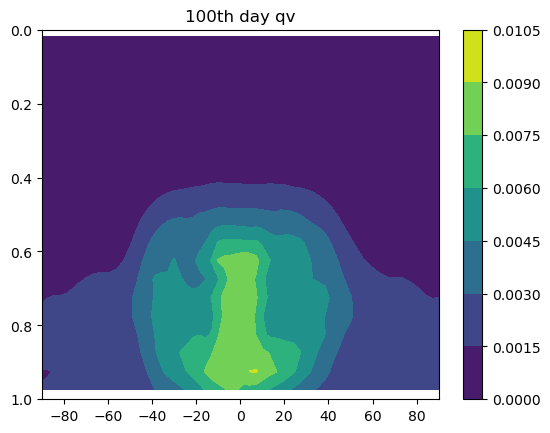

In [35]:
plt.figure(dpi=100.)
sigma_mean           = np.nanmean(p/ps, axis=(0,3))
sigma_onlyz          = np.nanmean(sigma_mean, axis=1)
y                    = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)
qv_mean = np.nanmean(qv, axis=3)
CS = plt.contourf(yy, sigma_mean2, qv_mean[100,:,:])
plt.colorbar(CS)
plt.ylim([1,0])
plt.title("100th day qv")
plt.show()

<Figure size 640x480 with 0 Axes>

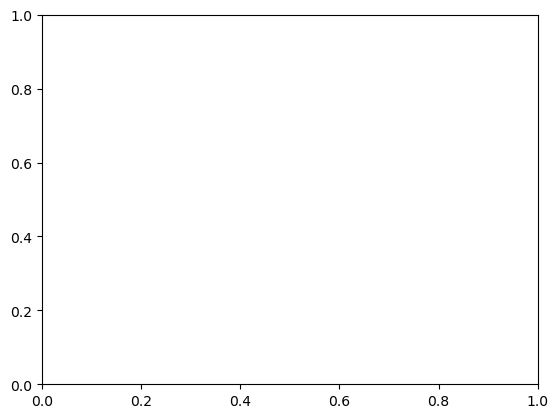

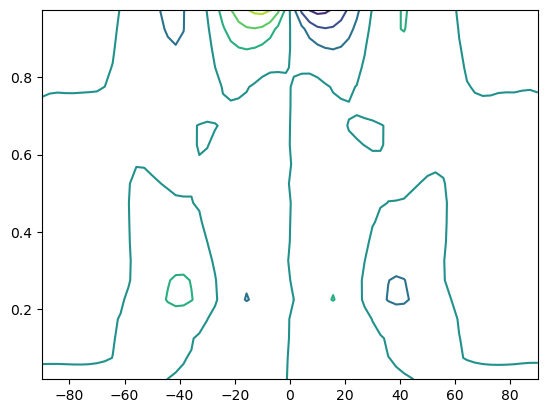

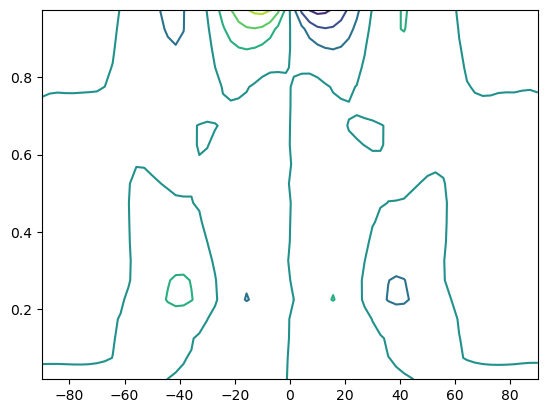

In [31]:

plt.figure()
v_mean = np.nanmean(v, axis=(0,3))
plt.contour(yy, sigma_mean2, v_mean)
plt.show()

